In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#pd.options.display.max_rows = 4000

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data Exploration

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/ID2223KTH/id2223kth.github.io/master/assignments/lab1/titanic.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Columns

In [4]:
df.columns
irrelevant=["PassengerId","Name","Ticket"]

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Any attributes with NaN

In [6]:
for col in df.columns:
    print(col,":",df[col].isna().any())

PassengerId : False
Survived : False
Pclass : False
Name : False
Sex : False
Age : True
SibSp : False
Parch : False
Ticket : False
Fare : False
Cabin : True
Embarked : True


## Age,Cabin,Embarked columns

In [7]:
display(df.Cabin.value_counts())

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [8]:
df.Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
import matplotlib.pyplot as plt

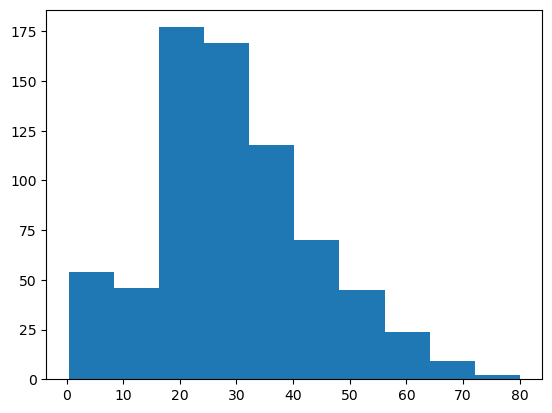

In [10]:
plt.hist(df.Age)
plt.show()

In [11]:
df.Age.mean()

29.69911764705882

In [12]:
df.Age.mode()

0    24.0
Name: Age, dtype: float64

In [13]:
df.Age.median()

28.0

In [14]:
display(df.Embarked.value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

# Feature Engineering

## Drop columns with low predictive power

In [16]:
temp=df.copy()
drop=["PassengerId","Name","Ticket"]
temp.drop(drop,axis=1,inplace=True)
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,NaN,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,NaN,S
889,1,1,male,26.0,0,0,30.0000,C148,C


# Convert Cabin to Deck

In [17]:
temp.Cabin.fillna("N",inplace=True)

In [18]:
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,N,S
887,1,1,female,19.0,0,0,30.0000,B42,S
888,0,3,female,NaN,1,2,23.4500,N,S
889,1,1,male,26.0,0,0,30.0000,C148,C


In [19]:
temp.Cabin=temp.Cabin.apply(lambda x:x[0])
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,N,S
887,1,1,female,19.0,0,0,30.0000,B,S
888,0,3,female,NaN,1,2,23.4500,N,S
889,1,1,male,26.0,0,0,30.0000,C,C


In [20]:
temp.rename(columns={"Cabin":"Deck"},inplace=True)

In [21]:
temp.Age=temp.Age.fillna(temp.Age.median())
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,N,S
887,1,1,female,19.0,0,0,30.0000,B,S
888,0,3,female,28.0,1,2,23.4500,N,S
889,1,1,male,26.0,0,0,30.0000,C,C


In [22]:
temp.Embarked=temp.Embarked.fillna("N")
temp

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Deck,Embarked
0,0,3,male,22.0,1,0,7.2500,N,S
1,1,1,female,38.0,1,0,71.2833,C,C
2,1,3,female,26.0,0,0,7.9250,N,S
3,1,1,female,35.0,1,0,53.1000,C,S
4,0,3,male,35.0,0,0,8.0500,N,S
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,N,S
887,1,1,female,19.0,0,0,30.0000,B,S
888,0,3,female,28.0,1,2,23.4500,N,S
889,1,1,male,26.0,0,0,30.0000,C,C


In [23]:
for col in temp.columns:
    print(col,":",temp[col].isna().any())

Survived : False
Pclass : False
Sex : False
Age : False
SibSp : False
Parch : False
Fare : False
Deck : False
Embarked : False


## One hot encode the categorical variables

In [24]:
temp.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Deck         object
Embarked     object
dtype: object

In [25]:
temp=pd.get_dummies(temp)

In [26]:
temp.rename(columns={col:col.lower() for col in temp.columns},inplace=True)

In [27]:
temp.columns

Index(['survived', 'pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female',
       'sex_male', 'deck_a', 'deck_b', 'deck_c', 'deck_d', 'deck_e', 'deck_f',
       'deck_g', 'deck_n', 'deck_t', 'embarked_c', 'embarked_n', 'embarked_q',
       'embarked_s'],
      dtype='object')

In [28]:
survive=temp.survived
temp=temp.drop(["survived"],axis=1)

# Train test split

In [29]:
from sklearn.model_selection import train_test_split


In [30]:
x_train,x_test,y_train,y_test=train_test_split(temp,survive,test_size=0.2,random_state=42)

# Model

In [31]:
from sklearn.ensemble import BaggingClassifier

In [32]:
model = BaggingClassifier(n_estimators=1000,
                          max_samples=100,
                          n_jobs=-1,
                          random_state=42)

In [33]:
model.fit(x_train,y_train)

BaggingClassifier(max_samples=100, n_estimators=1000, n_jobs=-1,
                  random_state=42)

In [34]:
pred=model.predict(x_test)

# Model accuracy based on train_test_split

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(y_test,pred)

0.7988826815642458

In [37]:
train_pred=model.predict(x_train)
accuracy_score(y_train,train_pred)

0.8707865168539326

# Hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
import scipy.stats as st

In [ ]:
model1=BaggingClassifier()

param_grid ={'max_samples':[10,100,1000],
            'n_estimators':[10,100,1000],
            'bootstrap':[True,False],
            'bootstrap_features':[True,False],
            'warm_start':[True,False],
            'max_features':[5,10,15,20]}

grid = GridSearchCV(model1,
                    param_grid, cv=10,
                    scoring='accuracy',
                    n_jobs=-1)

grid.fit(temp, survive)

In [ ]:
print("Best parameter (CV score=%0.3f):" % grid.best_score_)
print(grid.best_params_)

In [ ]:
grid_res = pd.DataFrame(grid.cv_results_)
grid_res= grid_res.sort_values(by=['rank_test_score'])
grid_res

In [ ]:
grid.best_params_

In [38]:
model2 = BaggingClassifier(n_estimators=1000,
                           max_samples=100,
                           max_features=20,
                           bootstrap_features=False,
                           bootstrap=False,
                          n_jobs=-1,
                          random_state=42)

model2.fit(x_train,y_train)

pred2=model2.predict(x_test)

# Model accuracy based on train_test_split




train_pred2=model2.predict(x_train)


In [39]:
accuracy_score(y_test,pred2)

0.8044692737430168

In [40]:
accuracy_score(y_train,train_pred2)

0.8707865168539326

# Result analysis

In [48]:
test=temp.copy()
test["survived"]=survive
test

,pclass,age,sibsp,parch,fare,sex_female,sex_male,deck_a,deck_b,deck_c,...,deck_e,deck_f,deck_g,deck_n,deck_t,embarked_c,embarked_n,embarked_q,embarked_s,survived
0,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,38.0,1,0,71.2833,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
3,1,35.0,1,0,53.1000,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
887,1,19.0,0,0,30.0000,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
888,3,28.0,1,2,23.4500,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
889,1,26.0,0,0,30.0000,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,1


<AxesSubplot:xlabel='fare', ylabel='age'>

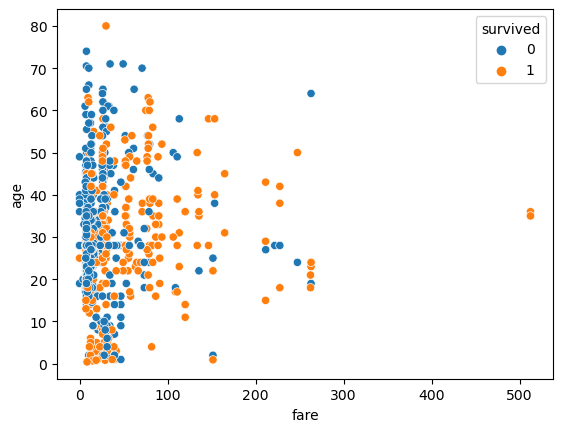

In [51]:
sns.scatterplot(x="fare",y="age",hue="survived",data=test)

In [56]:
test.corr()["survived"].sort_values(ascending=False)

survived      1.000000
sex_female    0.543351
fare          0.257307
deck_b        0.175095
embarked_c    0.168240
deck_d        0.150716
deck_e        0.145321
deck_c        0.114652
parch         0.081629
embarked_n    0.060095
deck_f        0.057935
deck_a        0.022287
deck_g        0.016040
embarked_q    0.003650
deck_t       -0.026456
sibsp        -0.035322
age          -0.064910
embarked_s   -0.155660
deck_n       -0.316912
pclass       -0.338481
sex_male     -0.543351
Name: survived, dtype: float64

In [58]:
test.groupby(by=["sex_female"]).size()

sex_female
0    577
1    314
dtype: int64

In [129]:
sur=0
for deck in "abcdefgnt":
    fands=len(test.query(f"deck_{deck}==1 & survived=={sur}"))/len(test)
    s=len(test.query(f"survived=={sur}"))/len(test)
    fgivens=fands/s
    print(deck,int(fgivens*100))

a 1
b 2
c 4
d 1
e 1
f 0
g 0
n 87
t 0


In [133]:
sur=1
for embarked in "cnqs":
    fands=len(test.query(f"embarked_{embarked}==1 & survived=={sur}"))/len(test)
    s=len(test.query(f"survived=={sur}"))/len(test)
    fgivens=fands/s
    print(embarked,int(fgivens*100))

c 27
n 0
q 8
s 63


In [136]:
len(test.query("survived==1"))/len(test)

0.3838383838383838

In [137]:
len(test.columns)

21

In [138]:
test.columns

Index(['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_female', 'sex_male',
       'deck_a', 'deck_b', 'deck_c', 'deck_d', 'deck_e', 'deck_f', 'deck_g',
       'deck_n', 'deck_t', 'embarked_c', 'embarked_n', 'embarked_q',
       'embarked_s', 'survived'],
      dtype='object')

In [141]:
import pandas as pd
import random


def generate_passenger(survived,
                    pclass_min,pclass_max,
                    age_min,age_max,
                    sibsp_min,sibsp_max,
                    parch_min,parch_max,
                    fare_min,fare_max,
                    deck_weights,
                    embarked_weights):
    """
    Returns a single iris flower as a single row in a DataFrame
    """
    import pandas as pd
    import random
    sex_female=0
    deck=[i for i in "abcdefgnt"]
    deck_dict={c:0 for c in "abcdefgnt"}
    embarked=[i for i in "cnqs"]
    embarked_dict={c:0 for c in "cnqs"}
    
    if survived==1:
       if random.random()<0.7:
          sex_female=1
       

    else:
       if random.random()<0.15:
          sex_female=1
    sex_male=1-sex_female
    deck_dict[random.choices(deck,deck_weights,k=1)[0]]=1
    embarked_dict[random.choices(embarked,embarked_weights,k=1)[0]]=1
    #generate random attributes
    df = pd.DataFrame({ "pclass": [random.randint(pclass_min, pclass_max)],
                        "age": [random.randint(age_min, age_max)],
                       "sibsp": [random.randint(sibsp_min, sibsp_max)],
                       "parch": [random.randint(parch_min, parch_max)],
                       "fare": [random.uniform(fare_min, fare_max)],
                       'sex_female':[sex_female],
                       'sex_male':[sex_male],
                       'deck_a':deck_dict["a"],
                       'deck_b':deck_dict["b"],
                       'deck_c':deck_dict["c"],
                       'deck_d':deck_dict["d"],
                       'deck_e':deck_dict["e"],
                       'deck_f':deck_dict["f"],
                       'deck_g':deck_dict["g"],
                       'deck_n':deck_dict["n"],
                       'deck_t':deck_dict["t"],
                       'embarked_c':embarked_dict["c"],
                       'embarked_n':embarked_dict["n"],
                       'embarked_q':embarked_dict["q"],
                       'embarked_s':embarked_dict["s"]
                      })
    df['survived'] = survived
    return df


def get_random_passenger():
    survived = generate_passenger(1,
                                  1,2,
                                  0,80,
                                  0,8,
                                  0,6,
                                  50,550,
                                  [2,10,10,7,7,2,0,60,0],
                                  [27,0,8,63])
    dead = generate_passenger(0,
                              2,3,
                              0,80,
                              0,8,
                              0,6,
                              0,100,
                              [1,2,4,1,1,0,0,87,0],
                              [13,0,8,77])
    if random.random()<0.4:
      #survive
      res=survived
      print("Added survived passenger")
    else:
      res=dead
      print("Added dead passenger")
    return res


display(get_random_passenger())


Added dead passenger


,pclass,age,sibsp,parch,fare,sex_female,sex_male,deck_a,deck_b,deck_c,...,deck_e,deck_f,deck_g,deck_n,deck_t,embarked_c,embarked_n,embarked_q,embarked_s,survived
0,2,71,4,2,40.328289,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [157]:
z=get_random_passenger()
convert={
                       'sex_female':"uint8",
                       'sex_male':"uint8",
                       'deck_a':"uint8",
                       'deck_b':"uint8",
                       'deck_c':"uint8",
                       'deck_d':"uint8",
                       'deck_e':"uint8",
                       'deck_f':"uint8",
                       'deck_g':"uint8",
                       'deck_n':"uint8",
                       'deck_t':"uint8",
                       'embarked_c':"uint8",
                       'embarked_n':"uint8",
                       'embarked_q':"uint8",
                       'embarked_s':"uint8"
       }
z=z.astype(convert)
z.dtypes

Added survived passenger


pclass          int64
age             int64
sibsp           int64
parch           int64
fare          float64
sex_female      uint8
sex_male        uint8
deck_a          uint8
deck_b          uint8
deck_c          uint8
deck_d          uint8
deck_e          uint8
deck_f          uint8
deck_g          uint8
deck_n          uint8
deck_t          uint8
embarked_c      uint8
embarked_n      uint8
embarked_q      uint8
embarked_s      uint8
survived        int64
dtype: object

In [145]:
test.dtypes

pclass          int64
age           float64
sibsp           int64
parch           int64
fare          float64
sex_female      uint8
sex_male        uint8
deck_a          uint8
deck_b          uint8
deck_c          uint8
deck_d          uint8
deck_e          uint8
deck_f          uint8
deck_g          uint8
deck_n          uint8
deck_t          uint8
embarked_c      uint8
embarked_n      uint8
embarked_q      uint8
embarked_s      uint8
survived        int64
dtype: object